https://kavita-ganesan.com/how-to-use-countvectorizer/#.XubRLkVKhPY 

https://github.com/jbesomi/texthero

https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089#:~:text=TF%2DIDF%20stands%20for%20%E2%80%9CTerm,Information%20Retrieval%20and%20Text%20Mining.
    
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28

https://medium.com/swlh/build-a-custom-named-entity-recognition-model-ussing-spacy-950bd4c6449f

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [ ]:
https://www.jessesadler.com/post/network-analysis-with-r/
https://medium.com/data-hackers/eu-li-3942-textos-da-new-order-parte01-tags-feef46653db7
https://scikit-network.readthedocs.io/en/latest/index.html
https://www.jessesadler.com/post/network-analysis-with-r/
https://cran.rstudio.com/web/packages/visNetwork/vignettes/Introduction-to-visNetwork.html

1 - cluster com matriz original <br>
2 - cluster com matriz inversa <br>
3 - cluster com PCA matriz original <br>
4 - cluster com PCA matriz inversa


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition  import PCA
from os import path

from sklearn import preprocessing

#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#from sklearn.feature_extraction.text import CountVectorizer
import pickle
import numpy as np

sns.set()
%matplotlib inline

In [416]:
path= '/disco01/gabriel/'

# CARREGANDO VETORES PALAVRAS

In [3]:
vector = pickle.load( open(path+'vector_unigram.pkl','rb'))
vectorizer = pickle.load(open(path+'vectorizer_unigram.pkl','rb'))

In [4]:
vector2 = pickle.load(open(path+'vector_bigram.pkl','rb'))    
vectorizer2 = pickle.load(open(path+'vectorizer_bigram.pkl','rb'))

In [5]:
vector3 = pickle.load(open(path+'vector_trigram.pkl','rb'))
vectorizer3 = pickle.load(open(path+'vectorizer_trigram.pkl','rb'))

In [6]:
vector_ifd = pickle.load(open(path+'vector_tf_unigram.pkl','rb'))
vectorizer_ifd = pickle.load(open(path+'vectorizer_tf_unigram.pkl','rb'))

In [7]:
vector_ifd_2 = pickle.load(open(path+'vector_tf_bigram.pkl','rb'))  
vectorizer_ifd_2 = pickle.load(open(path+'vectorizer_tf_bigram.pkl','rb'))

In [8]:
vector_ifd_3 = pickle.load(open(path+'vector_tf_trigram.pkl','rb'))  
vectorizer_ifd_3 = pickle.load(open(path+'vectorizer_tf_trigram.pkl','rb'))

## CONVERTENDO VETORES EM DF

In [9]:
df = pd.DataFrame(vector.toarray(),columns=vectorizer.get_feature_names())
df_2 = pd.DataFrame(vector2.toarray(),columns=vectorizer2.get_feature_names())
df_3 = pd.DataFrame(vector3.toarray(),columns=vectorizer3.get_feature_names())


In [ ]:
len(df.columns)

In [10]:
df_idf    = pd.DataFrame(vector_ifd.toarray(), columns=vectorizer_ifd.get_feature_names())
df_idf_2 = pd.DataFrame(vector_ifd_2.toarray(), columns=vectorizer_ifd_2.get_feature_names())
df_idf_3 = pd.DataFrame(vector_ifd_3.toarray(), columns=vectorizer_ifd_3.get_feature_names())


## NORMALIZANDO DADOS

In [ ]:
df_scale   = pd.DataFrame(preprocessing.scale(df),columns = df.columns)
df_scale_2 = pd.DataFrame(preprocessing.scale(df_2),columns = df_2.columns)
df_scale_3 = pd.DataFrame(preprocessing.scale(df_3),columns = df_3.columns)

In [ ]:
df_idf_scale   = pd.DataFrame(preprocessing.scale(df_idf),columns = df_idf.columns)
df_idf_scale_2 = pd.DataFrame(preprocessing.scale(df_idf_2),columns = df_idf_2.columns)
df_idf_scale_3 = pd.DataFrame(preprocessing.scale(df_idf_3),columns = df_idf_3.columns)

## PCA

### PCA NORMAIS

In [ ]:
plt.figure(figsize = (10,10))
pca = PCA().fit(df)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_2)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_2 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_3)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_3 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)


plt.legend(['Uni','Big','Trig'])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA NORMALIZADOS

In [ ]:

plt.figure(figsize = (10,7))
pca = PCA().fit(df_scale)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_scale = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_scale_2)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_scale_2 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)


pca = PCA().fit(df_scale_3)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_scale_3 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

plt.legend(['Uni','Big','Trig'])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA NORMAIS IDF

In [ ]:

plt.figure(figsize = (10,7))
pca = PCA().fit(df_idf)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_idf = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_idf_2)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_idf_2 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_idf_3)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_idf_3 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

plt.legend(['Uni','Big','Trig'])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA NORMALIZADOS IDF

In [ ]:

plt.figure(figsize = (10,7))
pca = PCA().fit(df_idf_scale)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_idf_scale = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_idf_scale_2)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_idf_scale_2 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

pca = PCA().fit(df_idf_scale_3)
a = np.cumsum(pca.explained_variance_ratio_)
comp_pca_idf_scale_3 = np.where((a>0.80) & (a<0.801))[0][0]
plt.plot(a)

plt.legend(['Uni','Big','Trig'])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(n_components=850)
df_pca = pca.fit_transform(df)


# Dump components relations with features:
#pd.DataFrame(pca.components_,columns=df_idf.columns)#,index = ['PC-1','PC-2'])


In [ ]:
pd.DataFrame(pca.components_,columns=df.columns)#,index = ['PC-1','PC-2'])

# CLUSTER
## Identificando melhor Número de K

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from IPython.display import Image


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


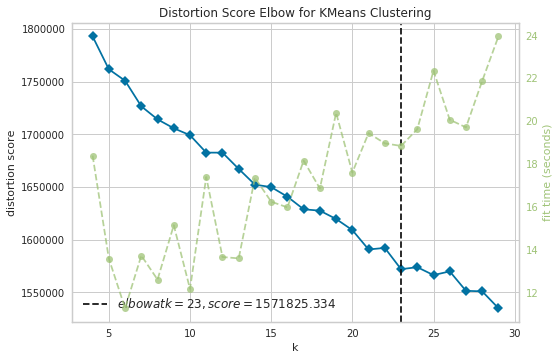

In [45]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,30))

visualizer.fit(df.sample(5000))        # Fit the data to the visualizer
plt.savefig('cluster_df')
visualizer.show()        # Finalize and render the figure

In [ ]:
Image("cluster_df.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))

visualizer.fit(df_2.sample(5000))        # Fit the data to the visualizer

plt.savefig('cluster_df_2')
visualizer.show()        # Finalize and render

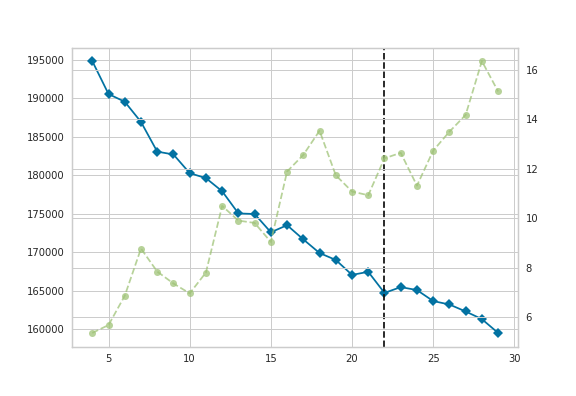

In [43]:
Image("cluster_df2.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_3.sample(5000))        # Fit the data to the visualizer
plt.savefig('cluster_df_3')
visualizer.show()        # Finalize and render


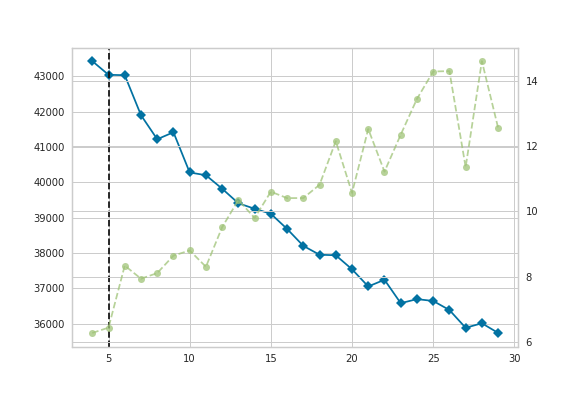

In [42]:
Image("cluster_df3.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_idf.sample(5000))        # Fit the data to the visualizer
plt.savefig('cluster_idf')
visualizer.show()        # Finalize and render


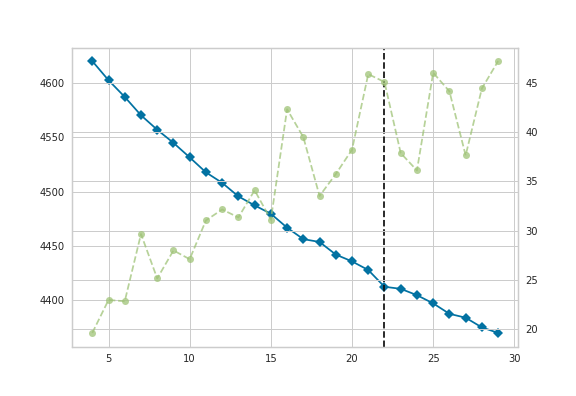

In [36]:
Image("cluster_idf.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_idf_2.sample(5000))        # Fit the data to the visualizer
plt.savefig('cluster_idf_2')
visualizer.show()        # Finalize and render


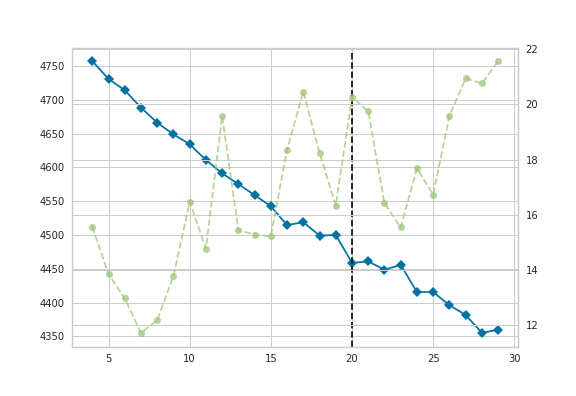

In [37]:
Image("cluster_idf_2.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_idf_3.sample(5000))        # Fit the data to the visualizer
plt.savefig('cluster_idf_3')
visualizer.show()        # Finalize and render


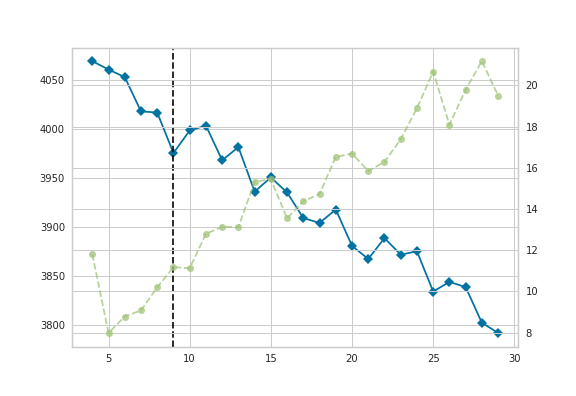

In [38]:
Image("cluster_idf_3.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_idf_scale.sample(5000))        # Fit the data to the visualizer
plt.savefig('df_idf_scale')
visualizer.show()        # Finalize and render


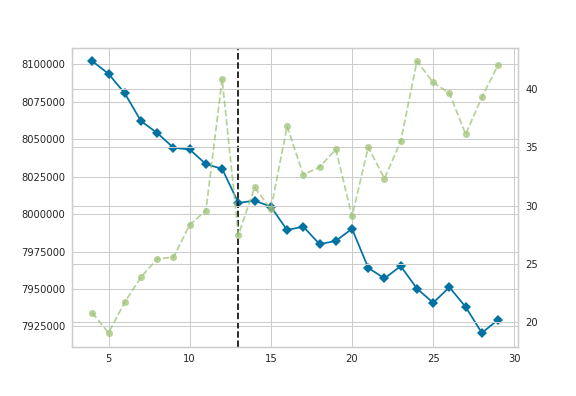

In [39]:
Image("df_idf_scale.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_idf_scale_2.sample(5000))        # Fit the data to the visualizer
plt.savefig('df_idf_scale_2')
visualizer.show()        # Finalize and render


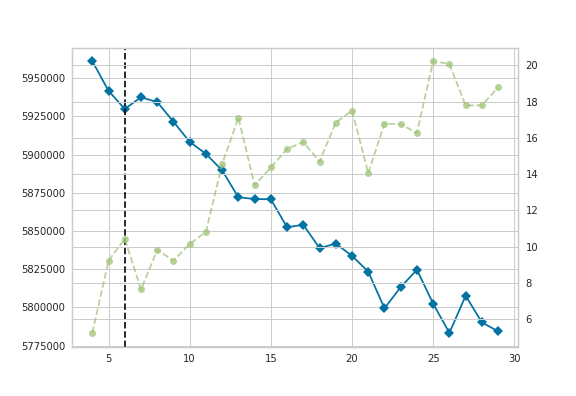

In [40]:
Image("df_idf_scale_2.png")

In [ ]:
visualizer = KElbowVisualizer(model, k=(4,30))
visualizer.fit(df_idf_scale_3.sample(5000))        # Fit the data to the visualizer
plt.savefig('df_idf_scale_3')
visualizer.show()        # Finalize and render


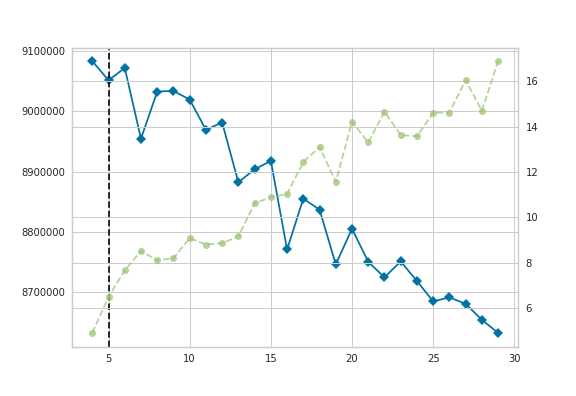

In [41]:
Image("df_idf_scale_3.png")

## Criando Modelo Cluster

In [46]:
model = MiniBatchKMeans(n_clusters= 18)
cluster_df = model.fit(df)

In [47]:
pickle.dump(model, open(path+'cluster_df.pkl','wb'))
df['cluster'] = cluster_df.labels_ 
pd.Series(cluster_df.labels_).value_counts()

In [49]:
model_2 = MiniBatchKMeans(n_clusters= 20)
cluster_df_2 = model_2.fit(df_2)

In [50]:
pickle.dump(model_2, open(path+'cluster_df_2.pkl','wb'))
df_2['cluster'] = cluster_df_2.labels_ 
pd.Series(cluster_df_2.labels_).value_counts()
#cluster_df_2.labels_.value_counts()

11    78208
17    11381
19     8844
6      8742
15     2488
13     1413
14      554
3       424
12      375
4       153
10      110
8        92
1        83
16       82
2        54
0        50
18       30
5        25
7        20
9        15
dtype: int64

In [458]:
df.head()#to_json(path+'df.json')

10  100  11  12  13  14  15  16  17  18  ...  votado  votamos  votando  \
0   0    6   0   1   0   0   1   0   1   0  ...       0        0        0   
1   0    0   0   0   0   0   0   0   0   0  ...       0        0        0   
2   0    0   1   0   0   0   0   0   0   0  ...       0        0        0   
3   0    0   0   0   0   0   0   0   0   0  ...       0        0        0   
4   0    0   0   0   0   0   0   0   0   0  ...       0        0        0   

   votar  voto  votos  vou  voz  zona  cluster  
0      0     0      0    0    0     0        4  
1      0     0      0    0    0     0        4  
2      0     0      0    1    0     0        4  
3      0     0      0    0    0     0        4  
4      0     0      0    0    0     0        4  

[5 rows x 1639 columns]

In [51]:
model_3 = MiniBatchKMeans(n_clusters= 20)
cluster_df_3 = model_3.fit(df_3)
df_3['cluster'] = cluster_df_3.labels_ 

pickle.dump(model_3, open(path+'cluster_df_3.pkl','wb'))
pd.Series(cluster_df_3.labels_).value_counts()
#cluster_df_2.labels_.value_counts()

1     55990
2     40187
11     4388
9      4271
0      2453
18     1307
14      995
8       936
19      651
5       591
13      437
16      321
10      207
7       151
17       91
12       70
15       62
6        14
4        14
3         7
dtype: int64

In [52]:
model_idf = MiniBatchKMeans(n_clusters= 20)
cluster_idf = model_idf.fit(df_idf)
df_idf['cluster'] = cluster_idf.labels_ 

pickle.dump(model_idf, open(path+'cluster_idf.pkl','wb'))
pd.Series(cluster_idf.labels_).value_counts()


2     17990
1     12782
18    10882
5      9186
3      7957
19     6803
7      6540
13     6320
15     6285
11     6155
10     3728
16     3450
14     2919
6      2452
8      2334
17     2298
12     1890
4      1653
0      1163
9       356
dtype: int64

In [53]:
model_idf_2 = MiniBatchKMeans(n_clusters= 20)
cluster_idf_2 = model_idf_2.fit(df_idf_2)
df_idf_2['cluster'] = cluster_idf_2.labels_ 

pickle.dump(model_idf_2, open(path+'cluster_idf_2.pkl','wb'))
pd.Series(cluster_idf_2.labels_).value_counts()


10    31193
8     19023
1      7364
13     5795
4      5548
12     5403
3      4876
6      4721
18     4338
2      4192
5      4173
15     4114
9      3403
16     3388
17     1853
14     1361
19     1299
11     1086
0         9
7         4
dtype: int64

In [54]:
model_idf_3 = MiniBatchKMeans(n_clusters= 20)
cluster_idf_3 = model_idf_3.fit(df_idf_3)
df_idf_3['cluster'] = cluster_idf_3.labels_ 

pickle.dump(model_idf_3, open(path+'cluster_idf_3.pkl','wb'))
pd.Series(cluster_idf_3.labels_).value_counts()


2     102469
9       3553
3       2430
8       1713
7        833
1        437
5        325
15       218
18       217
13       199
4        188
10       108
0        102
14        98
17        88
19        78
16        45
6         21
12        20
11         1
dtype: int64

In [ ]:
https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py

## Visualizando Resultados Cluster

https://amueller.github.io/word_cloud/auto_examples/frequency.html

https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html    


In [198]:
def get_freq_word_cluster(model_cluster, vectorizer, vector):
    dict_word_freq = {}
    
    order_centroids = model_cluster.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    array_qtd = vector.toarray().sum(axis=0)

    for i in range(len( np.unique(model_cluster.labels_) )):
        temp_dict = {}
        #print(i)
        print("Cluster %d" % i, end='')

        for ind in order_centroids[i, :10]:
            #print(ind)
            word = terms[ind-1]
            qtd = array_qtd[terms.index(word)]
            temp_dict[word] = qtd
            
            #print(' %s(%d)' % (word,qtd) , end='')
            
        dict_word_freq[str(i)] = temp_dict
        print()
    print("Finalizado!!!")
    return dict_word_freq

In [372]:
from wordcloud import (WordCloud, get_single_color_func)
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


In [448]:
def plot_words_cluster(dict_words, discursos):
    color = sns.color_palette("Paired",20).as_hex()
    
    for c in list(dict_words.keys()):
        words_color = {}
        color_select = color[int(c)]
        words_color[color_select] = list(dict_words[c].keys())
        default_color      = 'grey'
        grouped_color_func = GroupedColorFunc(words_color, default_color)

        wc = WordCloud(collocations=False).generate_from_frequencies( multidict.MultiDict(dict_words[c]) )
        wc.recolor(color_func=grouped_color_func)
        
        #plt.figure()
        
        fig, axs = plt.subplots(1,2, figsize = (15,15))
        
        #plt.imshow(wc, interpolation="bilinear")
        axs[0].imshow(wc, interpolation="bilinear")
        axs[0].set_title('Wordcloud Cluster: %s' % c)
        axs[0].axis("off")
        
        dict_partido = {}
        count_partido = discursos.loc[discursos.cluster == int(c), 'PARTIDO'].value_counts() #groupby(['PARTIDO']).PARTIDO.count()
        for p,n in zip(count_partido.keys(), count_partido.values):
            dict_partido[p] = n

        wc = WordCloud(collocations=False,max_words=5).generate_from_frequencies( multidict.MultiDict(dict_partido) )
        
        axs[1].imshow(wc, interpolation="bilinear")
        axs[1].axis("off")
        axs[1].set_title('Partidos Cluster: %s' % c)

        #plt.axis("off")
        #plt.title('Wordcloud Cluster: %s' % c)
        plt.show()

    #words_color

In [442]:
dict_unigram = get_freq_word_cluster(model, vectorizer, vector)
dict_unigram_idf = get_freq_word_cluster(model_idf, vectorizer_ifd, vector_ifd)

Cluster 0
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
Cluster 10
Cluster 11
Cluster 12
Cluster 13
Cluster 14
Cluster 15
Cluster 16
Cluster 17
Finalizado!!!
Cluster 0
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
Cluster 10
Cluster 11
Cluster 12
Cluster 13
Cluster 14
Cluster 15
Cluster 16
Cluster 17
Cluster 18
Cluster 19
Finalizado!!!


In [443]:
discursos = pd.read_json(path+'discursos_plen_limpo.json')


## Wordcloud Discursos e Partidos por Cluster

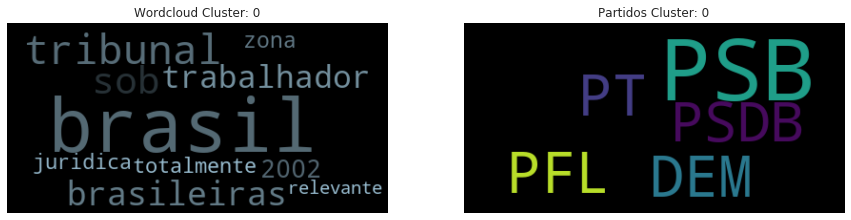

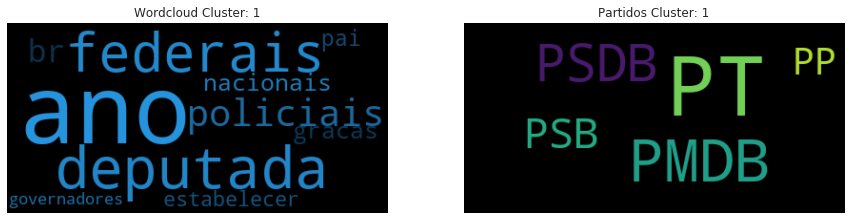

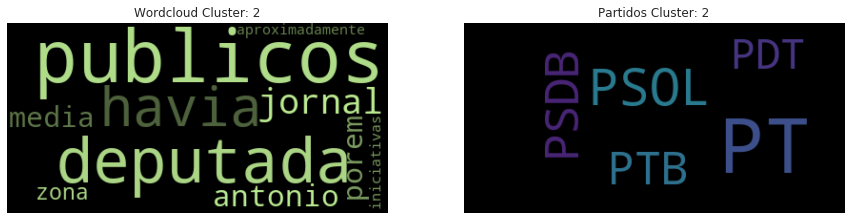

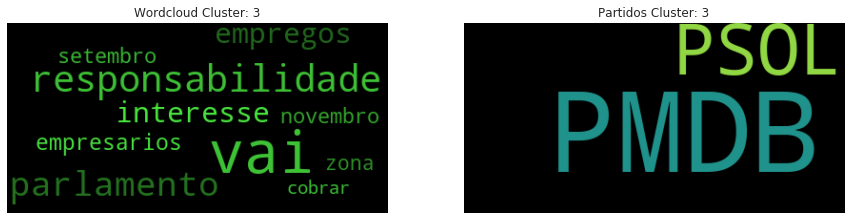

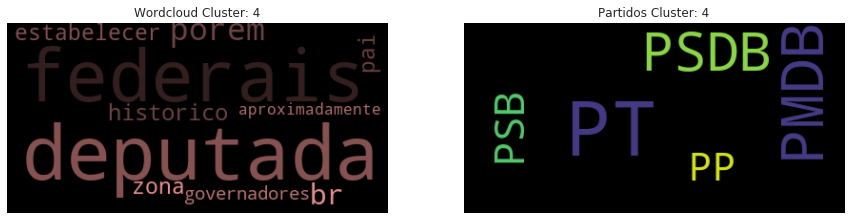

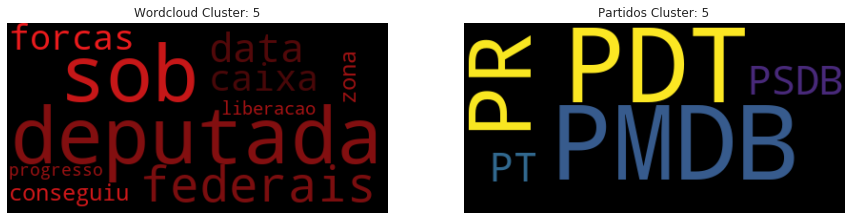

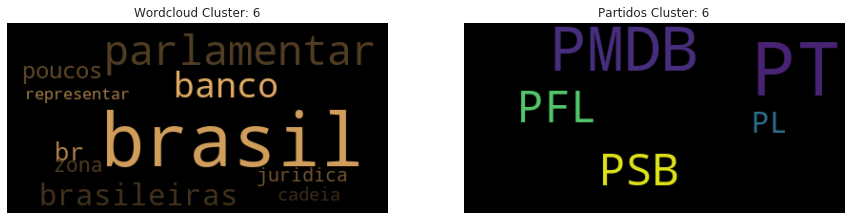

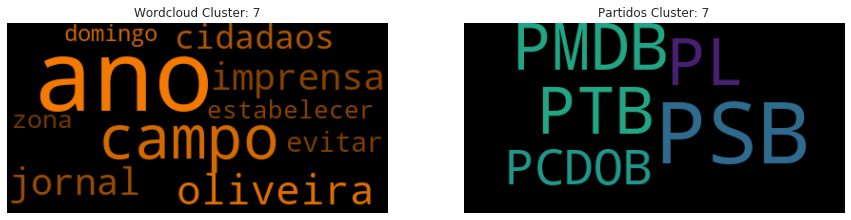

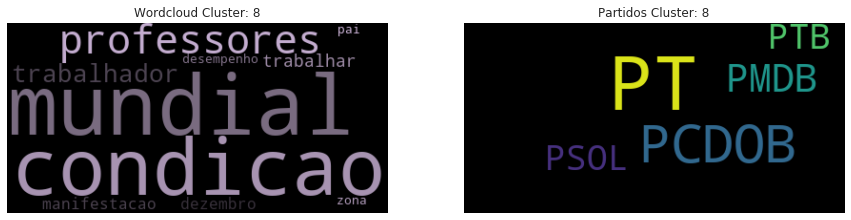

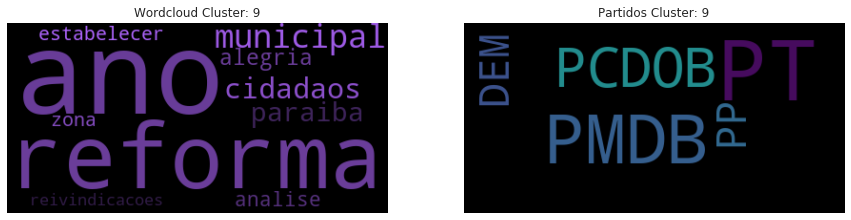

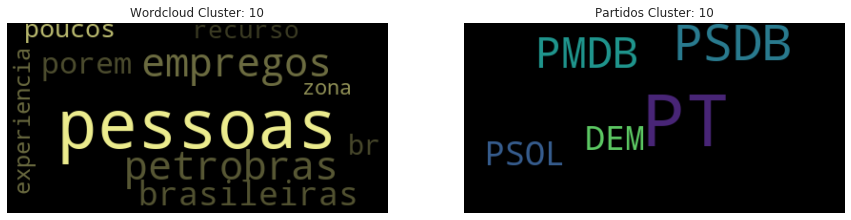

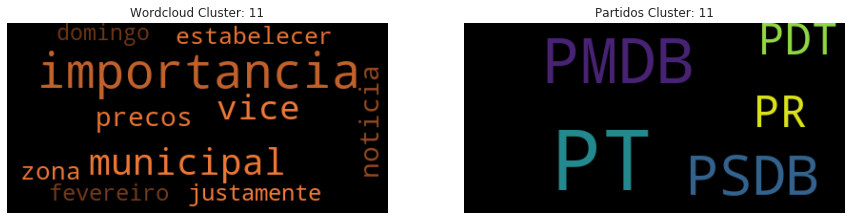

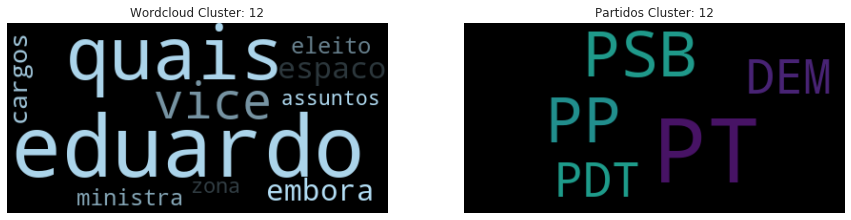

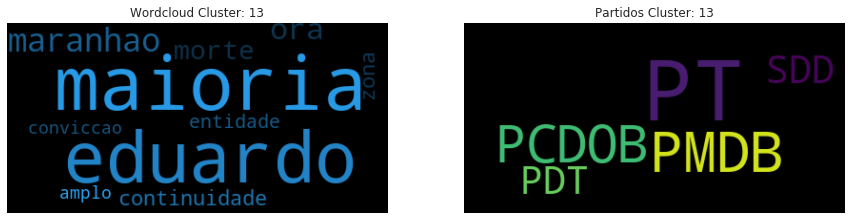

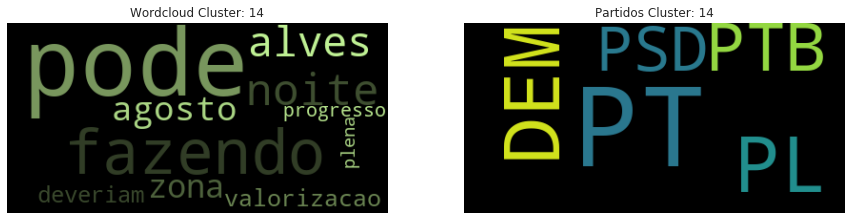

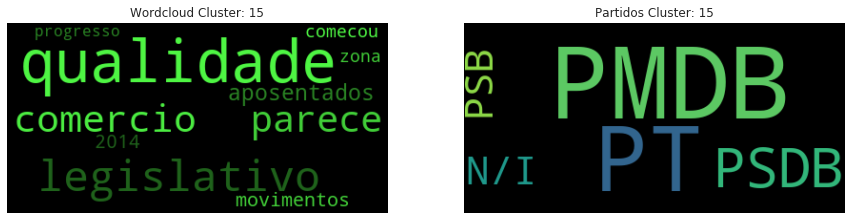

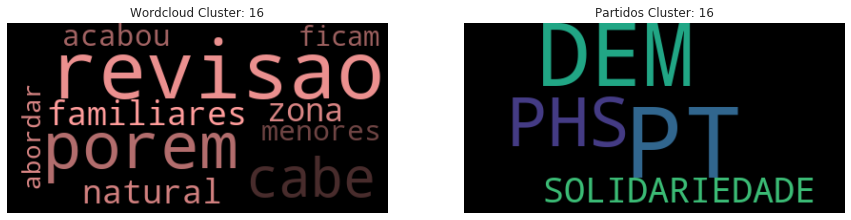

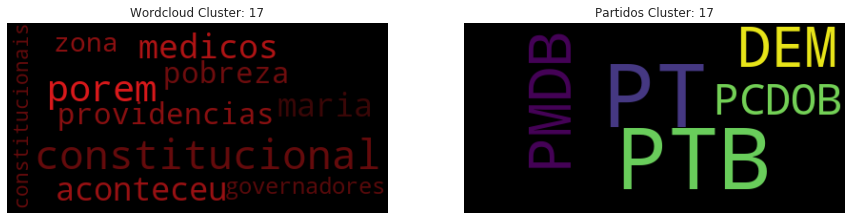

In [449]:
discursos['cluster'] = model.labels_
plot_words_cluster(dict_unigram, discursos)

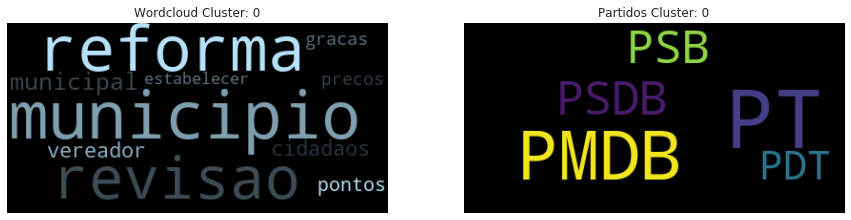

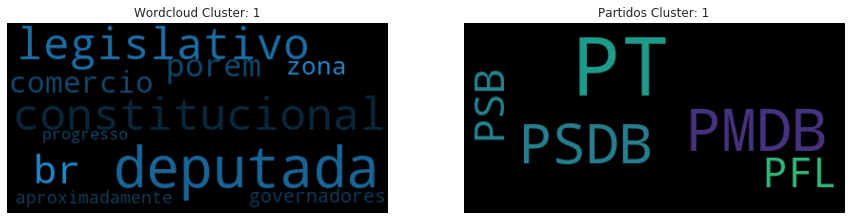

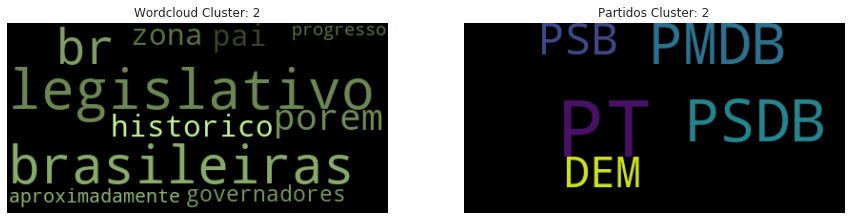

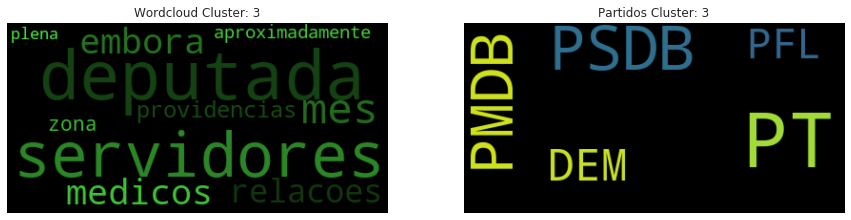

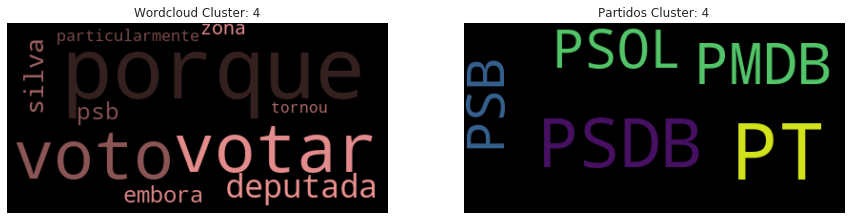

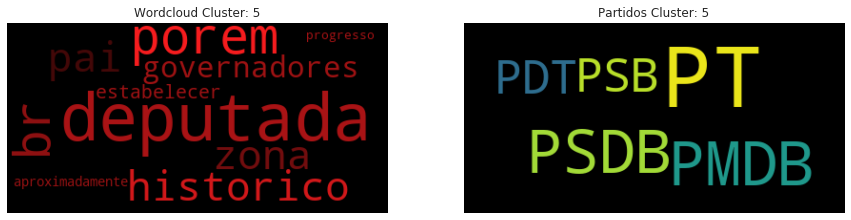

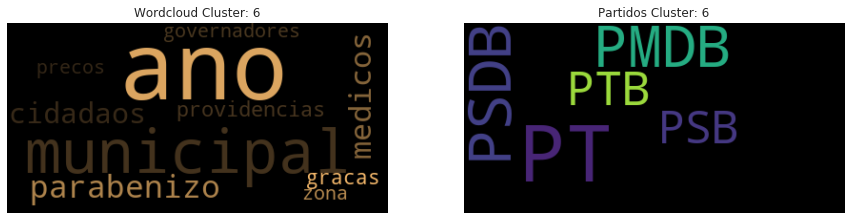

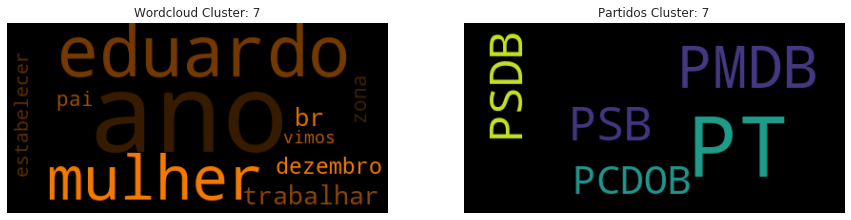

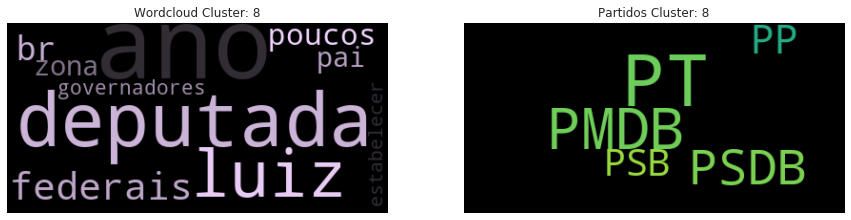

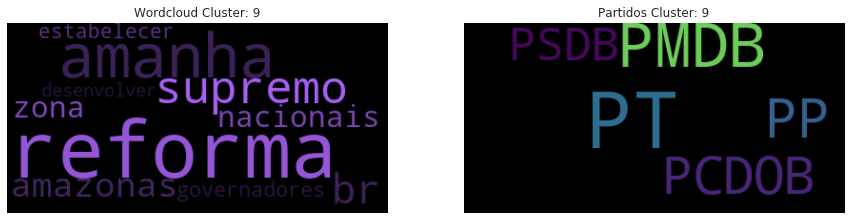

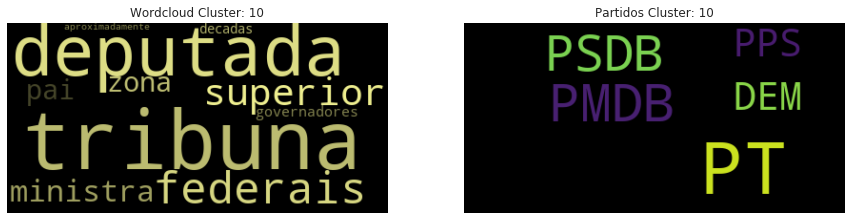

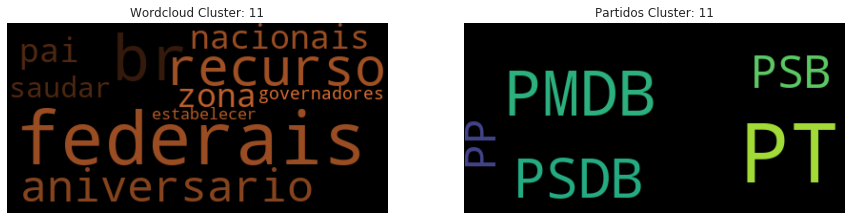

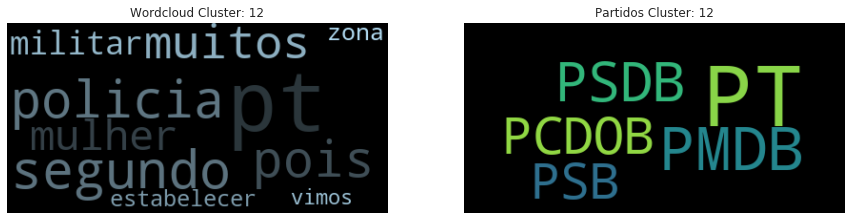

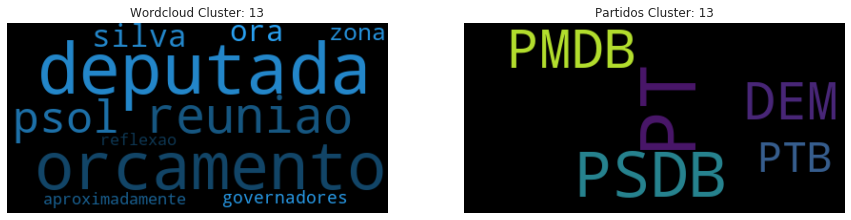

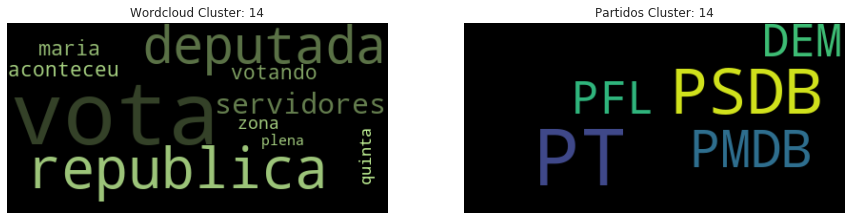

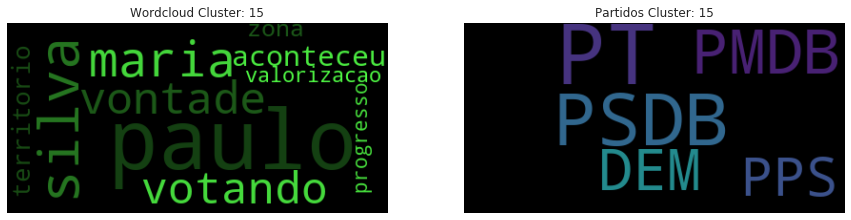

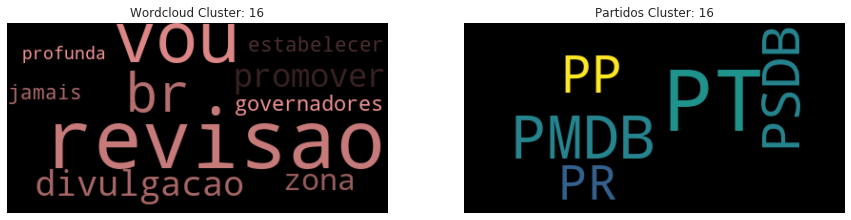

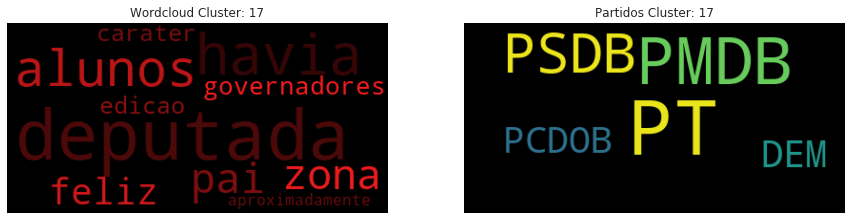

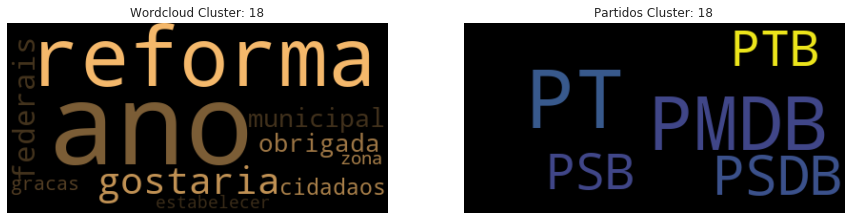

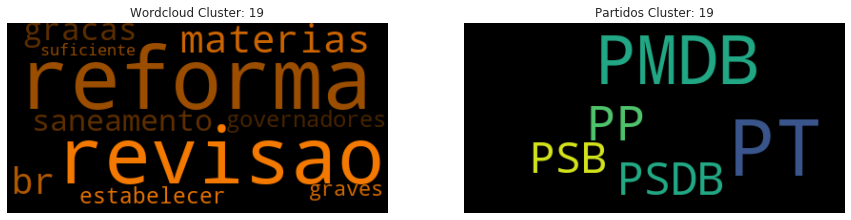

In [450]:
discursos['cluster'] = model_idf.labels_
plot_words_cluster(dict_unigram_idf,discursos)

In [ ]:
https://www.jessesadler.com/post/network-analysis-with-r/

In [ ]:
https://medium.com/data-hackers/eu-li-3942-textos-da-new-order-parte01-tags-feef46653db7

In [417]:
path

'/disco01/gabriel/'

In [421]:
discursos['cluster'] = model.labels_

In [425]:
 pd.Series(model.labels_).value_counts()

4     105914
1       6423
10       138
2        135
17       113
11       105
15        80
8         68
9         42
6         33
14        21
12        18
13        16
7         13
5         10
0          8
16         4
3          2
dtype: int64

In [426]:
discursos.loc[discursos.cluster == 11]

FILE  \
85      13269-02052001-17h06-GRANDE EXPEDIENTE-068-3-5...   
2864    3935-26102001-11h28-GRANDE EXPEDIENTE-218-3-51...   
3683    6473-20092001-9h30-BREVES COMUNICACOES-176-3-5...   
3710    17395-16022001-9h32-PEQUENO EXPEDIENTE-001-3-5...   
4304    12850-09052001-15h38-GRANDE EXPEDIENTE-075-3-5...   
...                                                   ...   
107949  5039-05102004-16h27-COMUNICACOES PARLAMENTARES...   
108483  16185-01032004-15h03-PEQUENO EXPEDIENTE-009-2-...   
109273  4112-21102004-15h04-PEQUENO EXPEDIENTE-225-2-5...   
109916  14764-17032004-15h02-BREVES COMUNICACOES-024-2...   
110883  5219-16092004-14h24-PEQUENO EXPEDIENTE-192-2-5...   

                                            CLEAN_CONTENT  \
85      angela guadagnin pt sp ordem revisao oradora p...   
2864    neste momento dar parabens prefeito icatu jose...   
3683    ocupo tribuna manifestar solidariedade deixar ...   
3710    retorno tribuna dar ciencia nacao denuncia env...   
4304    apos dois anos longe ruas justica volante volt...   
...                                                   ...   
107949  eleicoes estado transcorreram modo geral manei...   
108483  hoje cidade cuite paraiba toma posse prefeito ...   
109273  desejo unir companheiros homenagens prestam pa...   
109916  ultimo dia 11 surpreendido noticia passamento ...   
110883  mediante atuacao promotor justica comarca jose...   

                      SESSION_TYPE SESSION_DATE  MONTH  YEAR  SPEAKER_COUNT  \
85               GRANDE EXPEDIENTE   2001-05-02      5  2001              1   
2864             GRANDE EXPEDIENTE   2001-10-26     10  2001              1   
3683           BREVES COMUNICACOES   2001-09-20      9  2001              1   
3710            PEQUENO EXPEDIENTE   2001-02-16      2  2001              1   
4304             GRANDE EXPEDIENTE   2001-05-09      5  2001              1   
...                            ...          ...    ...   ...            ...   
107949  COMUNICACOES PARLAMENTARES   2004-10-05     10  2004              1   
108483          PEQUENO EXPEDIENTE   2004-03-01      3  2004              1   
109273          PEQUENO EXPEDIENTE   2004-10-21     10  2004              1   
109916         BREVES COMUNICACOES   2004-03-17      3  2004              1   
110883          PEQUENO EXPEDIENTE   2004-09-16      9  2004              1   

         HORA      ORADOR_CLEAN PARTIDO UF_PARTIDO  cluster  
85      17h06  ANGELA GUADAGNIN      PT         SP       11  
2864    11h28      PEDRO NOVAIS    PMDB         MA       11  
3683     9h30     NILSON MOURÃO      PT         AC       11  
3710     9h32     SAULO PEDROSA    PSDB         BA       11  
4304    15h38     MARCOS AFONSO      PT         AC       11  
...       ...               ...     ...        ...      ...  
107949  16h27       PAES LANDIM     PTB         PI       11  
108483  15h03        LUIZ COUTO      PT         PB       11  
109273  15h04        ÁTILA LINS     PPS         AM       11  
109916  15h02   ROGÉRIO TEÓFILO     PPS         AL       11  
110883  14h24       JOÃO CALDAS      PL         AL       11  

[105 rows x 12 columns]

In [436]:
dict_partido = {}
count_partido = discursos.loc[discursos.cluster == 11, 'PARTIDO'].value_counts() #groupby(['PARTIDO']).PARTIDO.count()
for p,n in zip(count_partido.keys(), count_partido.values):
    dict_partido[p] = n
    
dict_partido


{' PT': 25,
 ' PMDB': 13,
 ' PSDB': 10,
 ' PR': 6,
 ' PDT': 6,
 ' DEM': 5,
 ' PSD': 4,
 ' PSB': 4,
 ' PPS': 4,
 ' PSOL': 4,
 ' PTB': 4,
 ' PL': 3,
 ' PP': 3,
 ' PRB': 2,
 ' PRP': 2,
 ' PFL': 2,
 ' PV': 2,
 ' PHS': 1,
 ' NOVO': 1,
 ' PCDOB': 1,
 ' PSC': 1,
 ' PSL': 1,
 ' REDE': 1}

(-0.5, 399.5, 199.5, -0.5)

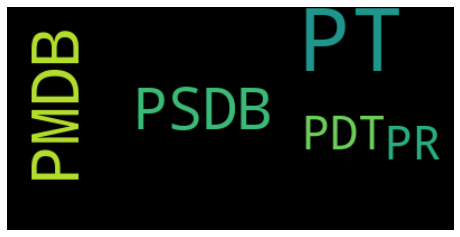

In [438]:
wc = WordCloud(collocations=False,max_words=5).generate_from_frequencies( multidict.MultiDict(dict_partido) )
plt.imshow(wc, interpolation="bilinear")
#axs[0].set_title('Wordcloud Cluster: %s' % c)
plt.axis("off")

In [ ]:
sns.color_palette("Paired",20).as_hex()[i-1]

In [129]:
#np.where(vectorizer.get_feature_names() == 'absurdo')
#vector.toarray().sum(axis=0)
vectorizer.get_feature_names().index('governo'),vector.toarray().sum(axis=0)[727]

(727, 150485)

In [130]:
order_centroids[0]
#pd.DataFrame({'t':vectorizer.get_feature_names(),'q':vector.toarray().sum(axis=0)}).sort_values(by = 'q', ascending=False)

array([1638, 1531, 1470, ..., 1067, 1068,    0])

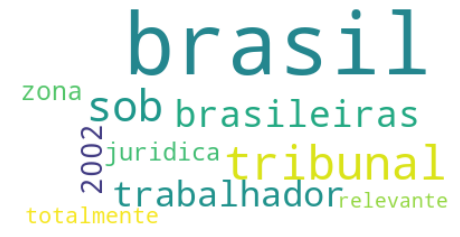

In [193]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(multidict.MultiDict(dict_word['0']))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [200]:
text = 'can also scale to large number of can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.'

In [211]:
wc = WordCloud(max_words=1000, margin=10,background_color="black",
               random_state=1).generate(text)

In [212]:
default_colors = wc.to_array()


In [316]:
import seaborn as sns
import matplotlib.pyplot as plt
current_palette = sns.color_palette('colorblind')
len(current_palette)

10

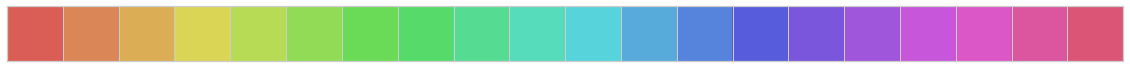

In [337]:
sns.palplot(sns.color_palette("hls", 20))


'#ff7f00'

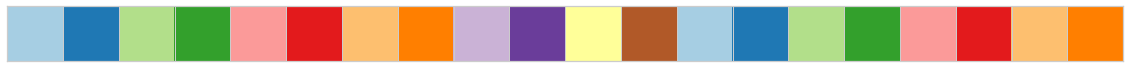

In [343]:
sns.palplot(sns.color_palette("Paired",20))
i = 
sns.color_palette("Paired",20).as_hex()[i-1]

In [268]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 70%%, %d%%)" % random.randint(60, 100)

(-0.5, 399.5, 199.5, -0.5)

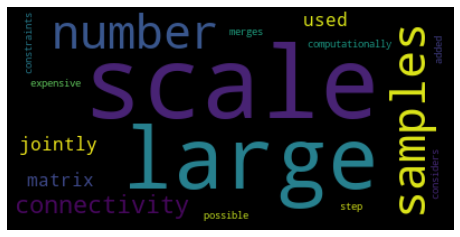

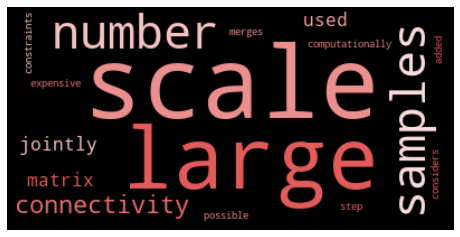

In [269]:
plt.imshow(default_colors, interpolation="bilinear")
recolor = wc.recolor(color_func=grey_color_func, random_state=3)
plt.axis("off")
plt.figure()
plt.imshow(recolor,interpolation="bilinear")

plt.axis("off")


In [30]:
df.to_csv(path+'df.csv', index=True)

In [ ]:
df.head()

In [ ]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)


In [ ]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [ ]:
discursos.head()

In [ ]:
counts = discursos.PARTIDO.value_counts()
print(len(counts))
for p,v in zip(counts.keys(),counts.values):
    print(p,v)

In [ ]:
discursos.dropna(inplace = True)
discursos.index = [i for i in range(len(discursos))]
discursos.head()

In [ ]:
vector.get_shape()


In [ ]:
df = pd.DataFrame(vector.toarray(),columns=vectorizer.get_feature_names())
df.head()

In [ ]:
count_tokens = pd.DataFrame({'token':vectorizer.get_feature_names(),'qtd':vector.toarray().sum(axis=0)})
#count_tokens.sort_values(by = 'qtd',ascending=False, inplace = True)
#count_tokens.to_csv('df_unigram_count.csv',index=False)
#count_tokens.sort_values(by = 'qtd',ascending=False)
count_tokens.qtd.describe()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_ifd = TfidfVectorizer(min_df= 0.02)
vector_ifd = vectorizer_ifd.fit_transform(discursos['CLEAN_CONTENT'])

In [ ]:
vector_ifd.shape

In [ ]:
113151*.05

In [ ]:
feature_names = vectorizer_ifd.get_feature_names()
dense     = vector_ifd.todense()
denselist = dense.tolist()
df_idf    = pd.DataFrame(denselist, columns=feature_names)
df_idf.head()

In [ ]:
count_tokens = pd.DataFrame({'token':vectorizer_ifd.get_feature_names(),'qtd':vector_ifd.toarray().sum(axis=0)})
count_tokens.sort_values(by = 'qtd',ascending=False)
#count_tokens.head()count_tokens = pd.DataFrame({'token':vectorizer_ifd.get_feature_names(),'qtd':vector_ifd.toarray().sum(axis=0)})
count_tokens.sort_values(by = 'qtd',ascending=False)
#count_tokens.head()

import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)



# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 


In [ ]:
amostra = df.iloc[:3,:100]#['brasil','governo','casa','populacao']]
amostra

In [ ]:
resultado = pd.DataFrame()

inic = 0
tamanho = 5
for i in range(0,len(amostra.columns)+1,tamanho):#['brasil','governo','casa','populacao']:
    fim = i+tamanho
    print(inic, fim)
    print(amostra.iloc[:,inic:fim])
    inic = fim
    #resultado = pd.concat([resultado,pd.DataFrame(preprocessing.scale(amostra[i]))],axis = 1)

In [ ]:
#import pandas as pd
#from sklearn import datasets

# load dataset

# normalize data
data_scaled = pd.DataFrame()#preprocessing.scale(df),columns = df.columns) 
lista = []
inic = 0
tamanho = 1000

for i in range(0,len(df.columns)+1,tamanho):#['brasil','governo','casa','populacao']:
    fim = i+tamanho
    print(inic, fim)
    #print(amostra.iloc[:,inic:fim])
    lista.append(preprocessing.scale(df.iloc[:,inic:fim]))
    #data_scaled = pd.concat([data_scaled,
     #                        pd.DataFrame(preprocessing.scale(df.iloc[:,inic:fim]),columns = df.columns[inic:fim])
      #                      ],axis = 1)
    inic = fim

data_scaled.shape

In [ ]:
data_scaled.head()

In [ ]:
data_scaled.to_csv('data_scaled.csv',index = False)

In [ ]:
#data_scaled_idf = pd.DataFrame(preprocessing.scale(df_idf),columns = df.columns) 

data_scaled_idf = pd.DataFrame()#preprocessing.scale(df),columns = df.columns) 

inic = 0
tamanho = 300
for i in range(0,len(df_idf.columns)+1,tamanho):#['brasil','governo','casa','populacao']:
    fim = i+tamanho
    print(inic, fim)
    #print(amostra.iloc[:,inic:fim])
    data_scaled_idf = pd.concat([data_scaled_idf,
                                 pd.DataFrame(preprocessing.scale(df_idf.iloc[:,inic:fim]))],axis = 1)    
    inic = fim

data_scaled_idf.shape

In [ ]:
#pd.DataFrame(data_scaled.values.T)
data_scaled_idf.head()


# PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_scaled)
pd.DataFrame(df_pca)

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [ ]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
df_pca.head()

In [ ]:
df_pca_idf.head()

In [ ]:
data_scaled.columns
pca.components_

In [ ]:
import seaborn as sns; sns.set()
pca = PCA().fit(df_idf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA().fit(data_scaled_idf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:

# PCA
#pca = PCA(n_components=2)
pca_idf = PCA(n_components=800)
#df_pca = pca.fit_transform(df)
df_pca_idf = pca_idf.fit_transform(df_idf)

# Dump components relations with features:
pd.DataFrame(pca.components_,columns=df_idf.columns)#,index = ['PC-1','PC-2'])


In [ ]:
# PCA
pca = PCA(n_components=900)
df_pca = pca.fit_transform(df.values.T)
pd.DataFrame(df_pca)
pd.DataFrame(df_pca.T, columns=data_scaled.columns)

In [ ]:
!pip install yellowbrick


In [ ]:
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,30))

visualizer.fit(df_idf.sample(5000))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,30))

visualizer.fit(data_scaled_idf.sample(5000))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#import random
#random.seed(2020)

cluster_tfidf = KMeans(n_clusters = 17, random_state = 2020)
cluster = cluster_tfidf.fit(df_idf)

In [ ]:
cluster.labels_

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
vis_tsne = tsne.fit_transform(df_idf)


In [ ]:
import seaborn as sns

sns.scatterplot(x = vis_tsne[:,0], y = vis_tsne[:,1], hue = cluster.labels_)#,palette = sns.color_palette('Set1'))

In [151]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
#from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    alice_mask = np.array(Image.open("alice_mask.png"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [153]:


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

#text = open(path.join(d, 'alice.txt'), encoding='utf-8')
text = "can also scale can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges."
getFrequencyDictForText(text)

<MultiDict('can': 2, 'scale': 2, 'large': 1, 'number': 1, 'samples': 1, 'when': 2, 'it': 2, 'used': 1, 'jointly': 1, 'connectivity': 2, 'matrix,': 1, 'but': 1, 'computationally': 1, 'expensive': 1, 'no': 1, 'constraints': 1, 'samples:': 1, 'considers': 1, 'each': 1, 'step': 1, 'possible': 1, 'merges.': 1)>

In [154]:
multidict.MultiDict({'gabriel':234,"lima":234})

<MultiDict('gabriel': 234, 'lima': 234)>

In [ ]:
def A( numero):
#{
    B = 1
    C = numero >> 1
    X = None
    continuar = True
    
    while continuar:
        X = (B + C) >> 1;
        #print("  X:{} - (B+C):{} - X²: {}".format(X,B+C,X*X))
        if(X * X <= numero):
            B = X
        else:
            C = X
        
        #print("  C-B: {}".format(C-B))
        if (C - B > 1):
            continuar = True
        else:
            continuar = False
    #while(C - B > 1):

    return B
